In [54]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [63]:

# Load the BEAT WELL dataset
file_path = "BEAT_WELL_BALANCED.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display dataset info and sample rows
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1650 non-null   int64  
 1   gender               1650 non-null   int64  
 2   height_cm            1650 non-null   int64  
 3   weight_kg            1650 non-null   int64  
 4   bmi                  1650 non-null   float64
 5   systolic_bp          1650 non-null   int64  
 6   diastolic_bp         1650 non-null   int64  
 7   bp_category          1650 non-null   int64  
 8   smoking_status       1650 non-null   int64  
 9   alcohol_consumption  1650 non-null   int64  
 10  physical_activity    1650 non-null   int64  
 11  cholesterol_level    1650 non-null   int64  
 12  blood_sugar          1650 non-null   int64  
 13  family_history       1650 non-null   int64  
 14  risk_score           1650 non-null   int64  
dtypes: float64(1), int64(14)

In [64]:
# Define features and target
X = df.drop("risk_score", axis=1)  # Features
y = df["risk_score"]  # Target column

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and Testing Set Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


Training and Testing Set Shapes:
X_train: (1320, 14), X_test: (330, 14)


In [65]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,         # Number of boosting rounds
    learning_rate=0.05,       # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    min_child_weight=1,       # Minimum sum of instance weight
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features used per tree
    random_state=42,
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)


In [67]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ Model Evaluation Metrics:
Accuracy: 0.9909
Precision: 0.9912
Recall: 0.9909
F1 Score: 0.9909

Confusion Matrix:
[[110   0   0]
 [  0 110   0]
 [  0   3 107]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.97      1.00      0.99       110
           2       1.00      0.97      0.99       110

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



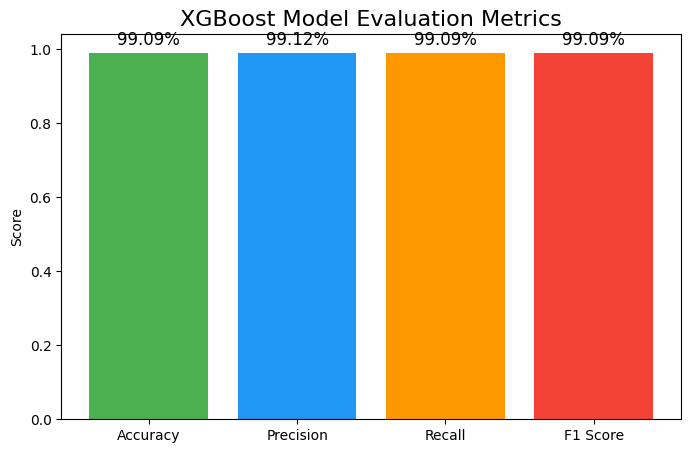

In [68]:
# Plotting accuracy
fig, ax = plt.subplots(figsize=(8, 5))

# Plot accuracy
ax.bar(["Accuracy", "Precision", "Recall", "F1 Score"],
       [accuracy, precision, recall, f1],
       color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])

# Display accuracy in percentage
for i, v in enumerate([accuracy, precision, recall, f1]):
    ax.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title("XGBoost Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score")
plt.show()


BALANCING


In [69]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/BEAT WELL DATASET.csv')

# Display class distribution
print(df['risk_score'].value_counts())  # Change 'risk_score' if your target column has a different name


risk_score
2    687
1    310
0      3
Name: count, dtype: int64


In [70]:
print(df.isnull().sum())


age                    0
gender                 0
height_cm              0
weight_kg              0
bmi                    0
systolic_bp            0
diastolic_bp           0
bp_category            0
smoking_status         0
alcohol_consumption    0
physical_activity      0
cholesterol_level      0
blood_sugar            0
family_history         0
risk_score             0
dtype: int64


In [48]:
import pandas as pd

df = pd.read_csv('/BEAT WELL DATASET.csv')
print(df['risk_score'].value_counts())  # replace with your actual target column if needed


risk_score
2    687
1    310
0      3
Name: count, dtype: int64


In [49]:
# Separate features and target
X = df.drop('risk_score', axis=1)  # Replace with your target column name if different
y = df['risk_score']

# One-hot encode categorical features (like gender, alcohol_consumption, etc.)
X_encoded = pd.get_dummies(X)


In [50]:
print(X_encoded.isnull().sum())


age                    0
gender                 0
height_cm              0
weight_kg              0
bmi                    0
systolic_bp            0
diastolic_bp           0
bp_category            0
smoking_status         0
alcohol_consumption    0
physical_activity      0
cholesterol_level      0
blood_sugar            0
family_history         0
dtype: int64


In [53]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print(y_train_bal.value_counts())  # Confirm balancing


risk_score
1    550
2    550
0    550
Name: count, dtype: int64


In [61]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

print(y_train_bal.value_counts())  # Confirm balancing

# Create a new DataFrame with the balanced data
df_balanced = pd.DataFrame(X_train_bal, columns=X_train.columns)  # Use original column names
df_balanced['risk_score'] = y_train_bal  # Add the target variable back

# Now you can save it
df_balanced.to_csv("BEAT_WELL_BALANCED.csv", index=False)

risk_score
1    550
2    550
0    550
Name: count, dtype: int64


In [62]:
# Assuming your balanced dataset is in df_balanced
df_balanced.to_csv("BEAT_WELL_BALANCED.csv", index=False)
